# Αναγνώριση προτύπων

* Χατζηθεοδώρου Ιάσων 03117089
* Κουνούδης Δημήτρης

## Εργαστήριο 1

In [ ]:
%matplotlib inline

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import numpy as np
import matplotlib.pyplot as plt
import sklearn, sklearn.metrics, sklearn.model_selection

import lib
import importlib

In [ ]:
# Useful for reloading lib.py when it is changed
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab1/lib.py'>

### Προπαρασκευή

#### Βήμα 1

In [5]:
def read_data_to_array(file):
  with open(file) as f:
    rawdata = f.readlines()
  data = [list(map(lambda x: float(x), row.split())) for row in rawdata]
  return np.array(data)

train = read_data_to_array('train.txt')
test = read_data_to_array('test.txt')

X_train = train[:, 1:]
X_test = test[:, 1:]
y_train = np.array([int(row[0]) for row in train])
y_test = np.array([int(row[0]) for row in test])

#### Βήμα 2

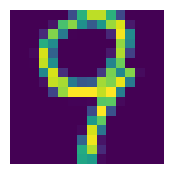

In [5]:
plt.figure(figsize = (2, 2))
lib.show_sample(X_train, 131)
plt.show()

#### Βήμα 3

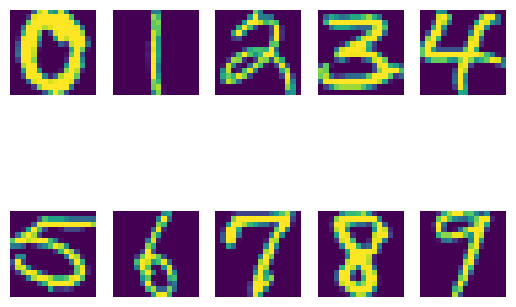

In [6]:
lib.plot_digits_samples(X_train, y_train)
plt.show()

#### Βήμα 4

In [7]:
lib.digit_mean_at_pixel(X_train, y_train, 0, (10, 10))

-0.5041884422110553

#### Βήμα 5

In [8]:
lib.digit_variance_at_pixel(X_train, y_train, 0, (10, 10))

0.5245221428814929

#### Βήμα 6

In [9]:
zero_mean = lib.digit_mean(X_train, y_train, 0)
zero_variance = lib.digit_variance(X_train, y_train, 0)

#### Βήμα 7

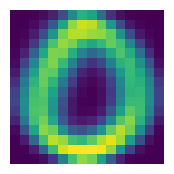

In [10]:
plt.figure(figsize = (2, 2))
plt.imshow(zero_mean.reshape((16, 16)))
plt.axis('off')
plt.show()

#### Βήμα 8

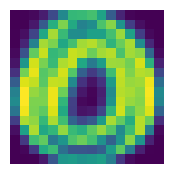

In [11]:
plt.figure(figsize = (2, 2))
plt.imshow(zero_variance.reshape((16, 16)))
plt.axis('off')
plt.show()

Παρατηρούμε ότι στην περίπτωση του variance διαχωρίζεται η γραμμή του ψηφίου 0 σε δύο μέρη. Αυτό συμβαίνει διότι τα περισσότερα δείγματα του συγκεκριμένου ψηφίου σε εκείνο το κομμάτι συμφωνούν άρα το variance είναι πολύ χαμηλό, ενώ αντίθετα διαφωνούν στο πού ακριβώς είναι τα όρια των γραμμών, για αυτό και είναι πιό έντονο το χρώμα εκεί που θα περιμέναμε να είναι το τέλος της γραμμής.

#### Βήμα 9

In [12]:
means = []
variances = []
for i in range(10):
    means.append(lib.digit_mean(X_train, y_train, i))
    variances.append(lib.digit_mean(X_train, y_train, i))

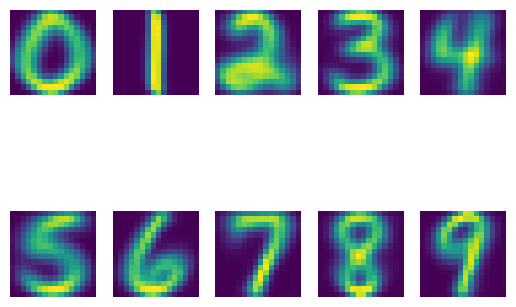

In [13]:
fig = plt.figure()

i = 1
for x in means:
    fig.add_subplot(2, 5, i)
    plt.imshow(x.reshape((16, 16)))
    plt.axis('off')
    i += 1

plt.show()

#### Βήμα 10

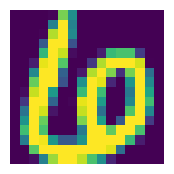

In [13]:
plt.figure(figsize = (2, 2))
lib.show_sample(X_test, 101)
plt.show()

In [14]:
print("The prediction is {}".format(lib.euclidean_distance_classifier(np.array(X_test[101]), means)[0]))
print("The correct answer is {}".format(y_test[101]))

The prediction is 4
The correct answer is 6


Το ψηφίο θα έπρεπε να αναγνωριστεί ως 6, όμως δεν είναι ξεκάθαρο ούτε σε άνθρωπο αυτό, επομένως είναι λογικό να αποτύχει ο euclidean classifier

#### Βήμα 11

In [15]:
predictions = lib.euclidean_distance_classifier(X_test, means)

print("The accuracy is {}".format(sklearn.metrics.accuracy_score(y_test, predictions)))

The accuracy is 0.8141504733432985


#### Βήμα 12

In [16]:
# The solution is in lib.py

#### Βήμα 13

In [17]:
# Evaluate classifier
score = lib.evaluate_euclidean_classifier(X_train, y_train, folds=5)

In [18]:
print("The 5-fold accuracy score of the classifier is {}".format(score))

The 5-fold accuracy score of the classifier is 0.8485803550358166


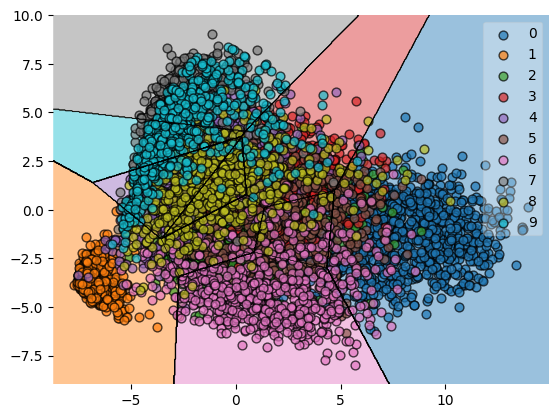

In [19]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
eucl_clf_pca = lib.EuclideanDistanceClassifier()
eucl_clf_pca.fit(X_pca, y_train)

scatter_kwargs = {'s': 40, 'edgecolor': 'k', 'alpha': 0.7}
plot_decision_regions(X_pca, y_train, clf=eucl_clf_pca, 
                      markers="o",
                      scatter_kwargs=scatter_kwargs)
plt.show()


In [20]:
# In order to plot learning curve use sklearn.learning_curve 
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
    lib.EuclideanDistanceClassifier(), X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

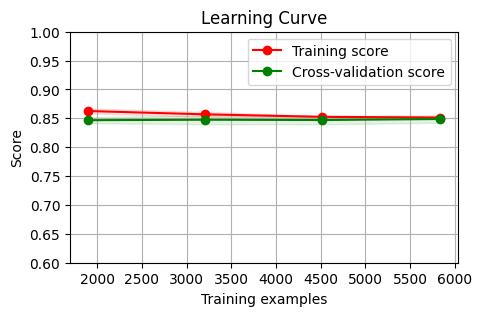

In [23]:
# This cell is from https://github.com/slp-ntua/python-lab/blob/master/Lab%200.3%20Scikit-learn.ipynb

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure(figsize=(5, 3))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))
plt.show()

### Εργαστηριακό μέρος

#### Βήμα 14

In [20]:
priors = lib.calculate_priors(X_train, y_train)

for idx, x in enumerate(priors):
    print("The a-priori probability of class {} is {:.5f}".format(idx, x))

The a-priori probability of class 0 is 0.16376
The a-priori probability of class 1 is 0.13784
The a-priori probability of class 2 is 0.10026
The a-priori probability of class 3 is 0.09025
The a-priori probability of class 4 is 0.08943
The a-priori probability of class 5 is 0.07626
The a-priori probability of class 6 is 0.09107
The a-priori probability of class 7 is 0.08847
The a-priori probability of class 8 is 0.07434
The a-priori probability of class 9 is 0.08833


#### Βήμα 15

In [18]:
importlib.reload(lib)
NB_clf = lib.CustomNBClassifier()
NB_clf.fit(X_train, y_train)

# NOTE: Variance smoothing applied is 1e-09
predictions = NB_clf.predict(X_test)
print("The accuracy of the custom implementation is {}".format(sklearn.metrics.accuracy_score(y_test, predictions)))

The accuracy of the custom implementation is 0.7199800697558545


In [16]:
from sklearn.naive_bayes import GaussianNB

for smoothing in [1e-9, 1e-5, 1e-2, 0.1, 0.5, 2]:
    sklearn_NB_clf = GaussianNB(var_smoothing=smoothing)
    sklearn_NB_clf.fit(X_train, y_train)
    sklearn_predictions = sklearn_NB_clf.predict(X_test)
    print("The accuracy of the sklearn implementation for var_smoothing={} is {:.5f}".format(smoothing, sklearn.metrics.accuracy_score(y_test, sklearn_predictions)))

The accuracy of the sklearn implementation for var_smoothing=1e-09 is 0.71948
The accuracy of the sklearn implementation for var_smoothing=1e-05 is 0.74689
The accuracy of the sklearn implementation for var_smoothing=0.01 is 0.79621
The accuracy of the sklearn implementation for var_smoothing=0.1 is 0.81565
The accuracy of the sklearn implementation for var_smoothing=0.5 is 0.78974
The accuracy of the sklearn implementation for var_smoothing=2 is 0.73842


Το accuracy που έβγαλε η δικιά μας υλοποίηση ήταν πρακτικά ίδιο με τον default GaussianNB (`var_smoothing=1e-09`). Στη δικιά μας υλοποίηση προσθέταμε παντού τον ίδιο αριθμό `1e-09` για να επιτύχουμε variance smoothing. 

Αντίθετα η υλοποίηση του scikit learn προσθέτει ένα συγκεκριμένο ποσοστό της μεγαλύτερης απόκλισης σε όλες τις αποκλίσεις, το οποίο μπορεί να αλλάξει ο χρήστης για να βρει το βέλτιστο. Όπως φαίνεται στην συγκεκριμένη περίπτωση το `var_smoothing=0.1` έχει αρκετά καλό accuracy.

#### Βήμα 16

In [68]:
# All variances are 1
NB_clf = lib.CustomNBClassifier(use_unit_variance=True)
NB_clf.fit(X_train, y_train)

predictions = NB_clf.predict(X_test)
print("The accuracy of the custom implementation with unit variances is {}".format(sklearn.metrics.accuracy_score(y_test, predictions)))

The accuracy of the custom implementation with unit variances is 0.8126557050323866


#### Βήμα 17

In [7]:
evaluators = [  ('Linear SVM', lib.evaluate_linear_svm_classifier), 
                ('RBF SVM', lib.evaluate_rbf_svm_classifier),
                ('5-Nearest Neighbors', lib.evaluate_knn_classifier), 
                ('Naive Bayes', lib.evaluate_sklearn_nb_classifier)
             ]
    
for ev in evaluators:
    print("The 5-fold cross validation accuracy of {} is {:.5f}".format(ev[0], ev[1](X_train, y_train)))


The 5-fold cross validation accuracy of Linear SVM is 0.95254
The 5-fold cross validation accuracy of RBF SVM is 0.97627
The 5-fold cross validation accuracy of 5-Nearest Neighbors is 0.95995
The 5-fold cross validation accuracy of Naive Bayes is 0.84501


#### Βήμα 18

In [13]:
# NOTE: Check what kind of mistakes each classifier makes
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
k_neighbors = KNeighborsClassifier()

print("Linear SVM mispredictions per class are {}".format(lib.classifier_mistakes_per_class(linear_svm, X_train, y_train, X_test, y_test)))
print("RBF SVM mispredictions per class are {}".format(lib.classifier_mistakes_per_class(rbf_svm, X_train, y_train, X_test, y_test)))
print("5-Nearest Neighbor mispredictions per class are {}".format(lib.classifier_mistakes_per_class(k_neighbors, X_train, y_train, X_test, y_test)))

Linear SVM mispredictions per class are [ 8  8 17 20 20 24 10 12 22  7]
RBF SVM mispredictions per class are [ 4 10 14 19 12  9 11  9 11  7]
5-Nearest Neighbor mispredictions per class are [ 5  5 16 12 17 16  7  9 15  9]


Όπως φαίνεται οι παραπάνω ταξινομητές δεν κάνουν τα ίδια λάθη, αν και υπάρχουν κάποιες ομοιότητες στην κατανομή λαθών, οπότε ο συνδυασμός τους με voting classifier μάλλον θα βελτιώσει την ακρίβεια των προβλέψεων

In [10]:
print("The 5-fold cross validation accuracy of the voting classifier with hard voting is {}".format(lib.evaluate_voting_classifier(X_train, y_train)))

The 5-fold cross validation accuracy of the voting classifier with hard voting is 0.9749003159989883


In [15]:
print("The 5-fold cross validation accuracy of the bagging classifier using Gaussian Naive Bayes is {}".format(lib.evaluate_bagging_classifier(X_train, y_train)))

The 5-fold cross validation accuracy of the bagging classifier using rbf SVM is 0.8472066385172774


Η χρήση του bagging classifier δεν φαίνεται να επηρεάζει σημαντικά το accuracy του Naive Bayes παρόλο που το βελτιώνει λίγο